Loading and preparing data...
Data split into 3428 training samples and 1470 testing samples.


--- Task A1 & A2: Simple Linear Regression (One Attribute) ---

Metrics on TRAINING data:
  - MSE: 0.5801
  - RMSE: 0.7616
  - MAPE: 1.7959
  - R2 Score: 0.1892

Metrics on TEST data:
  - MSE: 0.5792
  - RMSE: 0.7610
  - MAPE: 2.2170
  - R2 Score: 0.2087


--- Task A3: Multiple Linear Regression (Multiple Attributes) ---

Metrics on TRAINING data:
  - MSE: 0.5591
  - RMSE: 0.7477
  - MAPE: 1.6649
  - R2 Score: 0.2186

Metrics on TEST data:
  - MSE: 0.5280
  - RMSE: 0.7266
  - MAPE: 2.1845
  - R2 Score: 0.2786


--- Task A4 & A5: K-Means Clustering with k=2 ---
Cluster centers identified for k=2:
[[-2.23401489 -1.6839112  -1.32324823 -1.18886117 -1.10119848 -1.04383983]
 [-0.87312725 -0.71650627 -0.7194408  -0.69092724 -0.72498118 -0.69418484]]

Evaluation metrics for k=2 clustering:
  - Silhouette Score: 0.2360
  - Calinski-Harabasz Score: 1269.4731
  - Davies-Bouldin Score: 1.4502


--- Tas

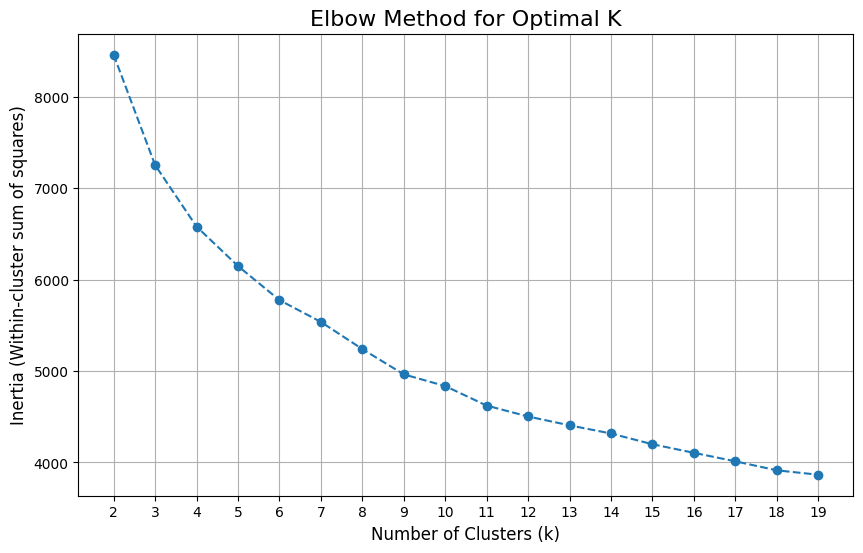

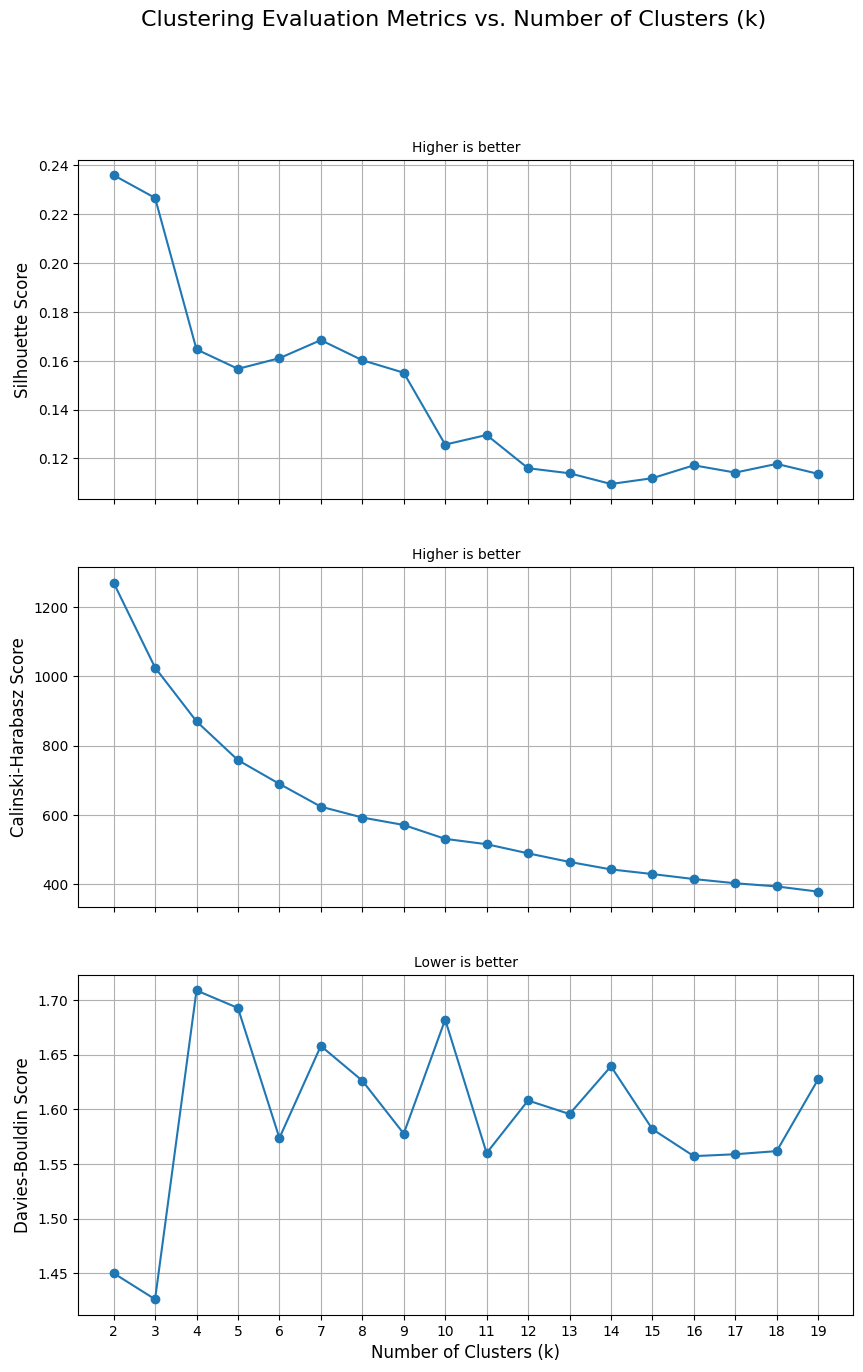



All tasks completed!


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import for data splitting
from sklearn.model_selection import train_test_split

# --- A1, A2, A3: Regression Models & Metrics ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# --- A4, A5, A6, A7: Clustering Models & Metrics ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# === CONFIG ===
# Path where you saved the extracted features (.npz files)
FEATURES_SAVE_ROOT = r"C:\Users\samee\Downloads\EEG_Features"
# Use a 70/30 split for training and testing data
TEST_SIZE = 0.3
# A fixed random state ensures that the data split is the same every time we run the code
RANDOM_STATE = 42

# =============================================================================
# DATA LOADING & PREPARATION FUNCTIONS
# =============================================================================

def load_all_features(feature_path):
    """
    Loads all feature files from the specified path and concatenates them into
    a single feature matrix (X) and a labels vector (y).
    
    Args:
        feature_path (str): The directory containing the _features.npz files.
        
    Returns:
        tuple: A tuple containing:
            - np.ndarray: The combined feature data (X).
            - np.ndarray: The combined label data (y).
    """
    all_features = []
    all_labels = []
    
    subject_files = sorted([f for f in os.listdir(feature_path) if f.endswith('_features.npz')])
    if not subject_files:
        raise FileNotFoundError(f"No feature files found in '{feature_path}'.")

    for filename in subject_files:
        filepath = os.path.join(feature_path, filename)
        data = np.load(filepath)
        all_features.append(data['features'])
        all_labels.append(data['labels'])
        
    X = np.concatenate(all_features, axis=0)
    y = np.concatenate(all_labels, axis=0)
    
    return X, y

# =============================================================================
# REGRESSION FUNCTIONS (A1, A2, A3)
# =============================================================================

def train_linear_regression(X_train, y_train):
    """
    Trains a linear regression model.
    
    Args:
        X_train (np.ndarray): Training feature data.
        y_train (np.ndarray): Training target data.
        
    Returns:
        LinearRegression: The fitted linear regression model object.
    """
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    return reg_model

def get_regression_predictions(model, X):
    """
    Makes predictions using a trained regression model.
    
    Args:
        model (LinearRegression): A fitted regression model.
        X (np.ndarray): The data to make predictions on.
        
    Returns:
        np.ndarray: The predicted values.
    """
    return model.predict(X)

def calculate_regression_metrics(y_true, y_pred):
    """
    Calculates a dictionary of common regression metrics.
    
    Args:
        y_true (np.ndarray): The true target values.
        y_pred (np.ndarray): The predicted values from the model.
        
    Returns:
        dict: A dictionary containing MSE, RMSE, MAPE, and R2 Score.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2 Score': r2}

# =============================================================================
# CLUSTERING FUNCTIONS (A4, A5, A6, A7)
# =============================================================================

def perform_kmeans_clustering(X, n_clusters):
    """
    Performs K-Means clustering on the given data.
    
    Args:
        X (np.ndarray): The data to cluster.
        n_clusters (int): The number of clusters (k).
        
    Returns:
        KMeans: The fitted KMeans model object.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto")
    kmeans.fit(X)
    return kmeans

def calculate_clustering_metrics(X, labels):
    """
    Calculates a dictionary of common clustering evaluation metrics.
    
    Args:
        X (np.ndarray): The data that was clustered.
        labels (np.ndarray): The cluster labels assigned by KMeans.
        
    Returns:
        dict: A dictionary containing Silhouette, Calinski-Harabasz, and Davies-Bouldin scores.
    """
    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    
    return {'Silhouette Score': sil_score, 'Calinski-Harabasz Score': ch_score, 'Davies-Bouldin Score': db_score}

def plot_elbow_method(k_range, inertia_scores):
    """
    Plots the inertia scores against k values to find the "elbow".
    
    Args:
        k_range (list): The list of k values tested.
        inertia_scores (list): The corresponding inertia for each k.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K', fontsize=16)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

def plot_clustering_evaluation_scores(k_range, all_scores):
    """
    Plots the different clustering metrics against k values.
    
    Args:
        k_range (list): The list of k values tested.
        all_scores (dict): A dictionary where keys are metric names and values are lists of scores.
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    fig.suptitle('Clustering Evaluation Metrics vs. Number of Clusters (k)', fontsize=16)
    
    axes[0].plot(k_range, all_scores['Silhouette'], marker='o')
    axes[0].set_ylabel('Silhouette Score', fontsize=12)
    axes[0].set_title('Higher is better', fontsize=10)
    axes[0].grid(True)
    
    axes[1].plot(k_range, all_scores['Calinski-Harabasz'], marker='o')
    axes[1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
    axes[1].set_title('Higher is better', fontsize=10)
    axes[1].grid(True)

    axes[2].plot(k_range, all_scores['Davies-Bouldin'], marker='o')
    axes[2].set_ylabel('Davies-Bouldin Score', fontsize=12)
    axes[2].set_title('Lower is better', fontsize=10)
    axes[2].grid(True)
    
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.xticks(k_range)
    plt.show()

# =============================================================================
# MAIN EXECUTION BLOCK
# =============================================================================
if __name__ == "__main__":
    
    # --- Data Loading and Splitting ---
    print("Loading and preparing data...")
    X_features, y_labels = load_all_features(FEATURES_SAVE_ROOT)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train_class, y_test_class = train_test_split(
        X_features, y_labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_labels
    )
    print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")
    
    # --- Artificial Regression Problem Setup ---
    # We will use the first feature column to predict the second feature column.
    # This is an artificial task to satisfy the assignment requirements.
    X_train_reg_simple = X_train[:, [0]] # Predictor: First feature
    X_test_reg_simple = X_test[:, [0]]
    
    X_train_reg_multi = X_train[:, 2:] # Predictor: All features EXCEPT the first two
    X_test_reg_multi = X_test[:, 2:]
    
    y_train_reg_target = X_train[:, 1] # Target: Second feature
    y_test_reg_target = X_test[:, 1]

    # --- A1 & A2: Simple Linear Regression (One Attribute) ---
    print("\n\n" + "="*50)
    print("--- Task A1 & A2: Simple Linear Regression (One Attribute) ---")
    print("="*50)
    
    # Train model
    simple_reg_model = train_linear_regression(X_train_reg_simple, y_train_reg_target)
    
    # Predict on training data
    y_train_pred_simple = get_regression_predictions(simple_reg_model, X_train_reg_simple)
    train_metrics_simple = calculate_regression_metrics(y_train_reg_target, y_train_pred_simple)
    
    # Predict on test data
    y_test_pred_simple = get_regression_predictions(simple_reg_model, X_test_reg_simple)
    test_metrics_simple = calculate_regression_metrics(y_test_reg_target, y_test_pred_simple)
    
    print("\nMetrics on TRAINING data:")
    for metric, value in train_metrics_simple.items():
        print(f"  - {metric}: {value:.4f}")
        
    print("\nMetrics on TEST data:")
    for metric, value in test_metrics_simple.items():
        print(f"  - {metric}: {value:.4f}")

    # --- A3: Multiple Linear Regression (All Other Attributes) ---
    print("\n\n" + "="*50)
    print("--- Task A3: Multiple Linear Regression (Multiple Attributes) ---")
    print("="*50)
    
    # Train model
    multi_reg_model = train_linear_regression(X_train_reg_multi, y_train_reg_target)
    
    # Predict on training data
    y_train_pred_multi = get_regression_predictions(multi_reg_model, X_train_reg_multi)
    train_metrics_multi = calculate_regression_metrics(y_train_reg_target, y_train_pred_multi)
    
    # Predict on test data
    y_test_pred_multi = get_regression_predictions(multi_reg_model, X_test_reg_multi)
    test_metrics_multi = calculate_regression_metrics(y_test_reg_target, y_test_pred_multi)
    
    print("\nMetrics on TRAINING data:")
    for metric, value in train_metrics_multi.items():
        print(f"  - {metric}: {value:.4f}")
        
    print("\nMetrics on TEST data:")
    for metric, value in test_metrics_multi.items():
        print(f"  - {metric}: {value:.4f}")

    # --- A4 & A5: K-Means Clustering (k=2) & Evaluation ---
    print("\n\n" + "="*50)
    print("--- Task A4 & A5: K-Means Clustering with k=2 ---")
    print("="*50)
    
    # Perform clustering
    kmeans_k2 = perform_kmeans_clustering(X_train, n_clusters=2)
    k2_labels = kmeans_k2.labels_
    k2_cluster_centers = kmeans_k2.cluster_centers_
    
    print(f"Cluster centers identified for k=2:\n{k2_cluster_centers}")
    
    # Evaluate the clustering
    k2_metrics = calculate_clustering_metrics(X_train, k2_labels)
    
    print("\nEvaluation metrics for k=2 clustering:")
    for metric, value in k2_metrics.items():
        print(f"  - {metric}: {value:.4f}")

    # --- A6 & A7: Finding Optimal K ---
    print("\n\n" + "="*50)
    print("--- Task A6 & A7: Finding Optimal K for Clustering ---")
    print("="*50)
    
    k_range = list(range(2, 20))
    inertia_scores = []
    clustering_scores = {'Silhouette': [], 'Calinski-Harabasz': [], 'Davies-Bouldin': []}
    
    print("Calculating clustering metrics for k from 2 to 19...")
    for k in k_range:
        kmeans_model = perform_kmeans_clustering(X_train, n_clusters=k)
        labels = kmeans_model.labels_
        
        # A7: Elbow method
        inertia_scores.append(kmeans_model.inertia_)
        
        # A6: Other metrics
        metrics = calculate_clustering_metrics(X_train, labels)
        clustering_scores['Silhouette'].append(metrics['Silhouette Score'])
        clustering_scores['Calinski-Harabasz'].append(metrics['Calinski-Harabasz Score'])
        clustering_scores['Davies-Bouldin'].append(metrics['Davies-Bouldin Score'])
    
    print("Calculations complete. Generating plots...")
    
    # A7 Plot
    plot_elbow_method(k_range, inertia_scores)
    
    # A6 Plot
    plot_clustering_evaluation_scores(k_range, clustering_scores)

    print("\n\nAll tasks completed!")